<a href="https://colab.research.google.com/github/JiaminJIAN/20MA573/blob/master/ODEs/Using%20SymPy%20to%20solve%20the%20ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Using SymPy to solve the ODE**

The tutorial: [SymPy](https://docs.sympy.org/dev/modules/solvers/ode.html)

### **ODE examples:**

**Example 1:**

Consider the second order linear ODE:

$$ f^{''}(x) + f(x) = 0.$$

The exact solution is

$$f(x) = C_{1} \sin (x) + C_{2} \cos (x),$$

where $C_{1}$ and $C_{2}$ are constants.



In [1]:
import sympy as sy
 
def differential_equation(x,f):
    return sy.diff(f(x),x,2)+f(x)   #f(x)''+f(x)=0
x=sy.symbols('x')     # x is a variable
f=sy.Function('f')    # f is a function
print(sy.dsolve(differential_equation(x,f),f(x)))
sy.pprint(sy.dsolve(differential_equation(x,f),f(x)))    #pprint in sympy


Eq(f(x), C1*sin(x) + C2*cos(x))
f(x) = C₁⋅sin(x) + C₂⋅cos(x)


**Example 2:**

Consider the ODE

$$\sin (x) \cos(f(x)) + \cos(x) \sin(f(x)) f^{'}(x) = 0,$$

where $f(x)$ is the function we need.

In [2]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x
f = Function('f')
eq = sin(x) * cos(f(x)) + cos(x) * sin(f(x)) * f(x).diff(x)
sy.pprint(dsolve(eq, hint='1st_exact'))
sy.pprint(dsolve(eq, hint='almost_linear'))

⎡             ⎛  C₁  ⎞                   ⎛  C₁  ⎞⎤
⎢f(x) = - acos⎜──────⎟ + 2⋅π, f(x) = acos⎜──────⎟⎥
⎣             ⎝cos(x)⎠                   ⎝cos(x)⎠⎦
⎡             ⎛      C₁     ⎞                   ⎛      C₁     ⎞⎤
⎢f(x) = - acos⎜─────────────⎟ + 2⋅π, f(x) = acos⎜─────────────⎟⎥
⎢             ⎜   __________⎟                   ⎜   __________⎟⎥
⎢             ⎜  ╱     2    ⎟                   ⎜  ╱     2    ⎟⎥
⎣             ⎝╲╱  -cos (x) ⎠                   ⎝╲╱  -cos (x) ⎠⎦


### **First order ODE system with two equations:**

**Example 3:**

Consider the ODE system

$$
\begin{cases}
x^{'}(t) = x(t) y(t) \sin(t) \\
y^{'}(t) = y^{2}(t) \sin(t)
\end{cases}$$

where $x(t)$ and $y(t)$ are the functions we need.

In [3]:
t = symbols('t')
x, y = symbols('x, y', cls=Function)
eq = (Eq(Derivative(x(t),t),x(t)*y(t)*sin(t)), Eq(Derivative(y(t),t),y(t)**2*sin(t)))
print(dsolve(eq))
sy.pprint(dsolve(eq))

{Eq(y(t), -1/(C1 - cos(t))), Eq(x(t), -exp(C1)/(C2*exp(C1) - cos(t)))}
   ⎛⎡              C₁                          ⎤⎞
   ⎜⎢            -ℯ                     -1     ⎥⎟
set⎜⎢x(t) = ───────────────, y(t) = ───────────⎥⎟
   ⎜⎢           C₁                  C₁ - cos(t)⎥⎟
   ⎝⎣       C₂⋅ℯ   - cos(t)                    ⎦⎠


**Example 4:**

Same as the example 3, consider the ODE system

$$
\begin{cases}
f^{'}(x) = g(x) \\
g^{'}(x) = f(x)
\end{cases}$$

where $f(x)$ and $g(x)$ are the functions we need. The solution of this ODE system is

$$f(x) = C_{1} e^{-x} +  C_{2} e^{x}, \quad g(x) = - C_{1} e^{-x} +  C_{2} e^{x}$$

In [4]:
x = symbols("x")
f, g = symbols("f g", cls=Function)
eqs = [Eq(f(x).diff(x), g(x)), Eq(g(x).diff(x), f(x))]
print(dsolve(eqs))
sy.pprint(dsolve(eqs))

[Eq(f(x), C1*exp(-x) + C2*exp(x)), Eq(g(x), -C1*exp(-x) + C2*exp(x))]
⎡           -x       x               -x       x⎤
⎣f(x) = C₁⋅ℯ   + C₂⋅ℯ , g(x) = - C₁⋅ℯ   + C₂⋅ℯ ⎦


### **First order ODE system with three equations:**

**Example 5:**

Consider the ODE system

$$
\begin{cases}
x^{'}(t) = - x^{2}(t) \\
y^{'}(t) = - y^{2}(t) - 2 x(t) y(t) \\
z^{'}(t) =  x(t)
\end{cases}$$

with the terminal condition 

$$x(0) = 1, y(0) = z(0) = 0.$$

The solution for this ODE system can be written as follows:

$$
\begin{cases}
x(t) = \frac{1}{1 + t} \\
y(t) = 0 \\
z(t) = \ln (t + 1).
\end{cases}$$

In [5]:
t = symbols('t')
x = symbols('x', cls=Function)
eq = Eq(Derivative(x(t),t), - x(t)**2)
print(dsolve(eq))
sy.pprint(dsolve(eq))

Eq(x(t), 1/(C1 + t))
         1   
x(t) = ──────
       C₁ + t


In [6]:
t = symbols('t')
x, z = symbols('x, z', cls=Function)
eq = (Eq(Derivative(x(t),t), - x(t)**2), Eq(Derivative(z(t),t), x(t)))
print(dsolve(eq))
sy.pprint(dsolve(eq))

TypeError: ignored

In [ ]:
t = symbols('t')
x, y, z = symbols('x, y, z', cls=Function)
eq = (Eq(Derivative(x(t),t), - x(t)**2), Eq(Derivative(y(t),t), - y(t)**2 - 2*x(t)*y(t)), Eq(Derivative(z(t),t), x(t)))
print(dsolve(eq))
sy.pprint(dsolve(eq))

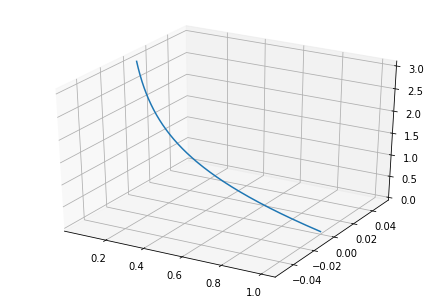

In [7]:
from scipy.integrate import odeint
import numpy as np

def ode_system(w, t):
    x, y, z = w
    return np.array([- x**2, - y**2 - 2*x*y, x])

t = np.arange(0, 20, 0.01) 
track = odeint(ode_system, (1.0, 0.0, 0.0), t)

# plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track[:,0], track[:,1], track[:,2])
plt.show()


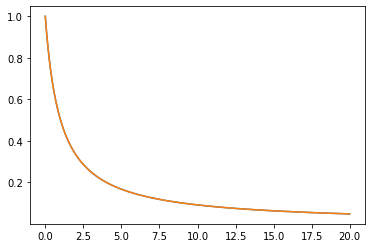

In [8]:
y1 = track[:,0]
plt.plot(t,y1)
plt.plot(t, 1/(1+t))

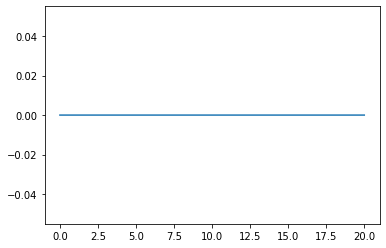

In [9]:
y2 = track[:,1]
plt.plot(t,y2)

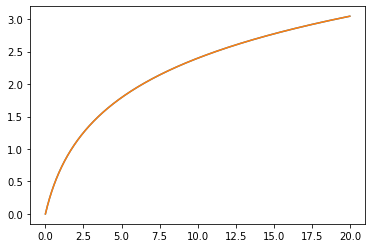

In [10]:
y3 = track[:,2]
plt.plot(t,y3)
plt.plot(t, np.log(1+t))

**Question:**

Consider the Ricatti system of ODEs

$$
\begin{cases}
\phi_{1}^{'}(t) = - \frac{1}{4} \phi_{3}^{2} (t) \\
\phi_{2}^{'}(t) = - \phi_{2}^{2}(t) + \phi_{3}(t) \\
\phi_{3}^{'}(t) = - \phi_{2}(t) \phi_{3}(t) + 2 \phi_{1}(t) \\
\phi_{4}^{'}(t) = - \frac{1}{2} \phi_{3}(t) \phi_{5}(t) \\
\phi_{5}^{'}(t) = - \phi_{2} (t) \phi_{5}(t) + \phi_{4}(t) \\
\phi_{6}^{'}(t) = - \frac{1}{4} \phi_{5}^{2}(t) + \sigma_{1}^{2} \phi_{1}(t) + \sigma_{2}^{2} \phi_{2}(t)
\end{cases}$$

with the terminal condition 

$$\phi_{1}(0) = - 1, \phi_{2}(0) = \phi_{3}(0) = \phi_{4}(0)  = \phi_{5}(0)  = \phi_{6}(0) = 0.$$

We want get the solution of this ODE system.

In [11]:
from sympy import symbols, Eq, Function
f1, f2, f3 = symbols("f1, f2, f3", cls=Function)
t = symbols("t")

eqs = (Eq(f1(t).diff(t), - 0.25 * f3(t) ** 2), Eq(f2(t).diff(t), f3(t) - f2(t) ** 2), Eq(f3(t).diff(t), 2 * f1(t) - f2(t) * f3(t)))
dsolve(eqs)

KeyError: ignored

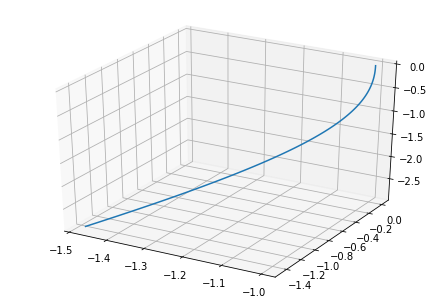

In [12]:
from scipy.integrate import odeint
import numpy as np

def ode_system(w, t):
    x, y, z = w
    return np.array([- 0.25 * z**2, z - y**2, 2*x - z*y])

t = np.arange(0, 1, 0.01) 
track = odeint(ode_system, (-1, 0.0, 0.0), t)

# plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track[:,0], track[:,1], track[:,2])
plt.show()


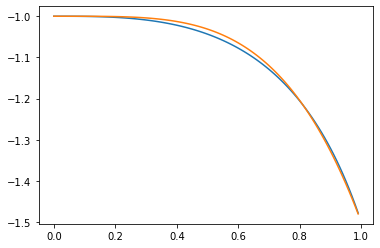

In [13]:
y1 = track[:,0]
plt.plot(t,y1)
plt.plot(t, -0.5 * t ** 4 - 1)

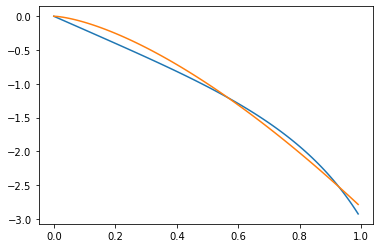

In [14]:
y3 = track[:,2]
plt.plot(t,y3)
plt.plot(t, - 2 * np.sqrt(2) * t ** 1.5)